# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Tasya Panggabean
- **Email:** tasyapanggabean661@gmail.com
- **ID Dicoding:** MC009D5X2451

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 :
Bagaimana tren penggunaan sepeda dari waktu ke waktu (per bulan) untuk mengidentifikasi pola musiman?
- Pertanyaan 2 :
Apakah ada perbedaan signifikan dalam penggunaan sepeda antara hari kerja dan hari libur, dan bagaimana hal ini dapat memengaruhi strategi pemasaran?

## Import Semua Packages/Library yang Digunakan

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [10]:
# Load dataset (day.csv)
df = pd.read_csv("https://raw.githubusercontent.com/Tasyaya/Submission-Tasya/refs/heads/main/Data/day.csv")

# Tampilkan 5 baris pertama
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada dataset diatas berisikan informasi pembagian data dari penggunaan sepeda per hari, seperti tanggal, musim, hari kerja, dan total pengguna.

### Assessing Data

In [11]:
# Cek informasi dataset
df.info()

# Cek missing value
df.isnull().sum()

# Cek duplikat data
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


0

**Insight:**
- Dataset diatas memiliki 731 baris dan 16 kolom
- Dataset tidak mempunyai missing value dan data duplikat

### Cleaning Data

In [12]:
# Mengubah kolom 'dteday' ke tipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Cek kembali informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Pada kolom dteday perlu kita ubah ke tipe datetime agar mudah dalam menganalisis.

## Exploratory Data Analysis (EDA)

### Explore ...

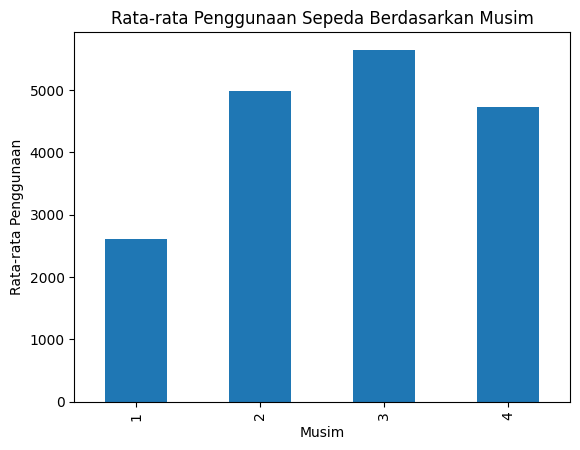

In [13]:
# Statistik deskriptif
df.describe()

# Distribusi penggunaan sepeda berdasarkan musim
df.groupby('season')['cnt'].mean().plot(kind='bar')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penggunaan')
plt.show()

**Insight:**
- Musim gugur (fall/autumn) menunjukkan puncak penggunaan sepeda, kemungkinan karena cuaca yang nyaman untuk bersepeda.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan penggunaan sepeda dari waktu ke waktu (per bulan)?

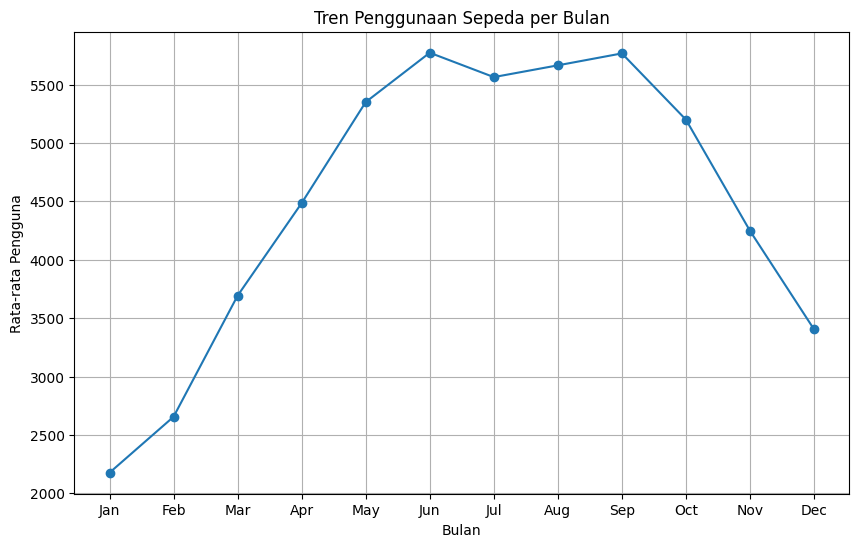

In [14]:
# Ekstrak bulan dari kolom 'dteday'
df['month'] = df['dteday'].dt.month

# Hitung rata-rata penggunaan sepeda per bulan
monthly_avg = df.groupby('month')['cnt'].mean()

# Visualisasi tren penggunaan sepeda per bulan
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', marker='o')
plt.title('Tren Penggunaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Pengguna')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

**Insight:**

Dari grafik garis(line plot) diatas dapat kita simpulkan bahwa penggunaan sepeda mulai meningkat dari bulan Januari hingga bulan Juni, kemudian pada bulan September mulai terlihat penurunan hingga bulan Desember.

### Pertanyaan 2: Apakah ada perbedaan dalam penggunaan sepeda antara hari kerja dan hari libur?

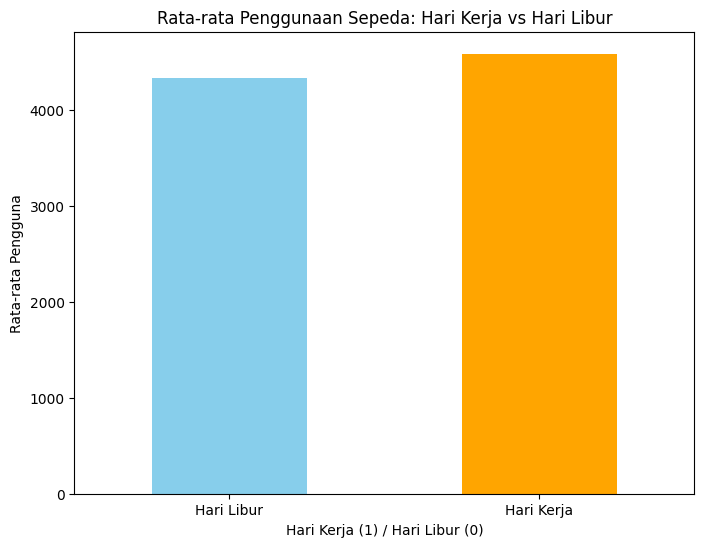

In [15]:
# Hitung rata-rata penggunaan sepeda untuk hari kerja dan hari libur
avg_usage = df.groupby('workingday')['cnt'].mean()

# Visualisasi menggunakan bar plot
plt.figure(figsize=(8, 6))
avg_usage.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Rata-rata Penggunaan Sepeda: Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (1) / Hari Libur (0)')
plt.ylabel('Rata-rata Pengguna')
plt.xticks(ticks=[0, 1], labels=['Hari Libur', 'Hari Kerja'], rotation=0)
plt.show()

**Insight:**
- Pada grafik atau yang bisa kita sebut bar chart diatas terlihat penggunaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur.

## Analisis Lanjutan (Opsional)

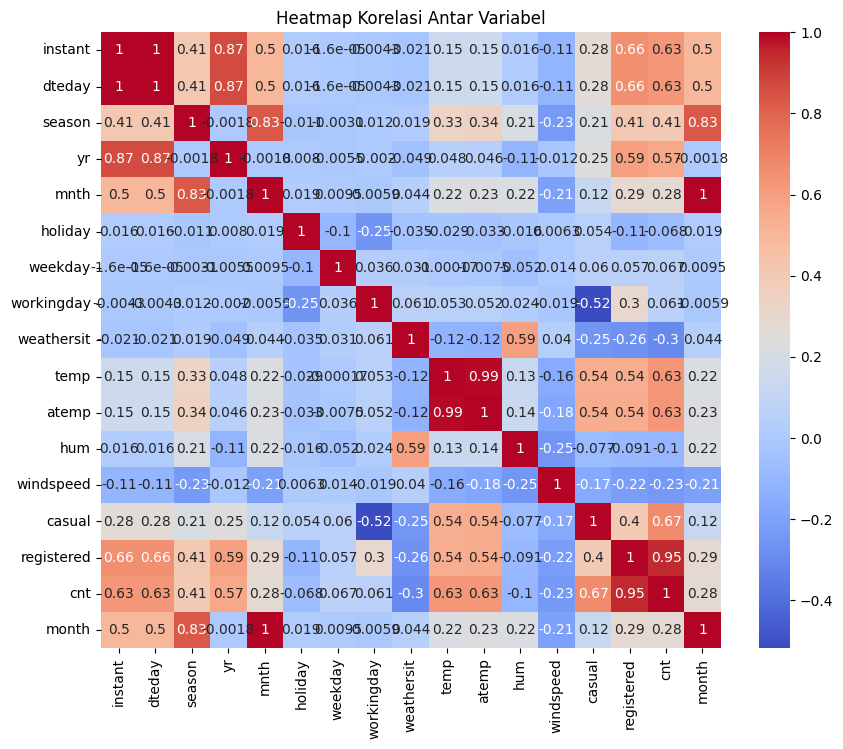

In [16]:
# Korelasi antara variabel numerik
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
Berdasarkan tren bulanan, strategi pemasaran dapat ditingkatkan pada bulan-bulan dengan penggunaan tinggi (Juni) dan dipertahankan pada bulan-bulan dengan penggunaan rendah (Desember).
- Conclution pertanyaan 2 :
Promosi khusus dapat dilakukan pada hari libur untuk meningkatkan penggunaan sepeda di luar konteks komuter.